# Predicting NYC Apartment Sales Prices: A Machine Learning Pipeline Experiment

## Abstract

This project investigates the use of a machine learning (ML) pipeline to predict the sales price of apartments in New York City based on publicly available data. The pipeline encompasses data preprocessing, feature engineering, model training, and evaluation. The experiment adheres to the scientific method, aiming to provide a clear, reproducible framework for addressing this predictive task. The final model leverages Random Forest regression, and Shapley values are used to interpret feature importance.

*Note: This Data was scraped from this website: https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt/about_data , and is applicable for the dates of July 2nd, 2019 - January 11th, 2024*



## Introduction

The problem of predicting apartment sales prices is critical in real estate for decision-making and market analysis. This project aims to address this problem using a structured ML pipeline that handles data preprocessing, feature engineering, and model evaluation. The project follows these steps:

1. Problem definition

2. Data exploration

3. Model design

4. Model evaluation

5. Insights and interpretation

# Step 1: Problem Definition

The goal is to predict apartment sales prices (“SALE PRICE”) using features such as location, property size, and neighborhood.

# Imports: Lets's get started

In [2]:
!pip install ydata-profiling
!pip install category_encoders

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 84.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=9caeea70621520f23cfe85e365ab1846bce069dfd27c31c2034110f4e8c6f70a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
   ━━━━━━━━━━━━━━━━━━━━━━

* Necessary libraries are installed and imported.

* The dataset is loaded, and a profiling report is generated for exploratory data analysis (EDA).

In [1]:
# mandatory imports for building a model
import pandas as pd
import numpy as np

# model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

#visualizations
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import shap



In [3]:
data = pd.read_csv('/content/NYC_Citywide_Rolling_Calendar_Sales_20250106.csv')

data


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,"1,646",1497.0,1899.0,1,A1,215000,04/18/2023
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,"1,646",1497.0,1899.0,1,A1,570000,08/23/2023
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,NaN,A1,461 EAST 178 STREET,NaN,...,1.0,0.0,1.0,"1,782",1548.0,1899.0,1,A1,0,04/14/2023
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3053,86,NaN,S0,2364 WASHINGTON AVENUE,NaN,...,1.0,2.0,3.0,"1,911",4080.0,1931.0,1,S0,0,10/24/2023
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,NaN,B9,454 EAST 172 STREET,NaN,...,2.0,0.0,2.0,"1,658",1428.0,1901.0,1,B9,350000,06/26/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71828,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,122,NaN,B9,77 ROBIN COURT,NaN,...,2.0,0.0,2.0,"6,105",2160.0,1994.0,1,B9,0,06/23/2023
71829,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,141,NaN,B9,68 ROBIN CT,NaN,...,2.0,0.0,2.0,"4,440",2160.0,1994.0,1,B9,0,04/26/2023
71830,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,145,NaN,B9,48 ROBIN COURT,NaN,...,2.0,0.0,2.0,"3,147",2400.0,1994.0,1,B9,815000,05/09/2023
71831,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7359,1,NaN,B2,104 GLADWIN STREET,NaN,...,2.0,0.0,2.0,"4,345",2200.0,2001.0,1,B2,0,01/27/2023


profile Report for EDA

In [ ]:
# create a profile with different colors for seeing the labels
profile = ProfileReport(data, title="NYC Citywide Rolling Calendar Sales Report")
profile

## extra EDA's

In [ ]:
print(data.dtypes)

In [ ]:
data.info()

BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                               int64
LOT                                 int64
EASE-MENT                         float64
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                 float64
COMMERCIAL UNITS                  float64
TOTAL UNITS                       float64
LAND SQUARE FEET                   object
GROSS SQUARE FEET                 float64
YEAR BUILT                        float64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                          int64
SALE DATE                          object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71833 entries, 0 to 71832
Data columns (total 21 colum

In [ ]:
data.isnull().sum()

,0
BOROUGH,0
NEIGHBORHOOD,0
BUILDING CLASS CATEGORY,0
TAX CLASS AT PRESENT,64
BLOCK,0
LOT,0
EASE-MENT,71833
BUILDING CLASS AT PRESENT,64
ADDRESS,0
APARTMENT NUMBER,54844


In [ ]:
data.describe()

,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,71833.000000,71833.000000,71833.000000,0.0,71824.000000,54333.000000,41626.000000,56567.000000,3.939200e+04,66977.000000,71833.000000,7.183300e+04
mean,2.975694,4213.506091,384.715924,NaN,10852.984184,3.586715,0.418272,3.752859,6.891363e+03,1952.207952,1.646513,1.273183e+06
std,1.295481,3558.498316,661.063371,NaN,565.164922,24.816851,6.734385,25.075554,4.886010e+04,35.437998,0.789753,7.103843e+06
min,1.000000,1.000000,1.000000,NaN,10001.000000,0.000000,0.000000,0.000000,0.000000e+00,1800.000000,1.000000,0.000000e+00
25%,2.000000,1276.000000,22.000000,NaN,10305.000000,1.000000,0.000000,1.000000,1.369000e+03,1925.000000,1.000000,0.000000e+00
50%,3.000000,3305.000000,50.000000,NaN,11209.000000,1.000000,0.000000,1.000000,1.980000e+03,1949.000000,2.000000,5.090500e+05
75%,4.000000,6229.000000,1002.000000,NaN,11357.000000,2.000000,0.000000,2.000000,2.825000e+03,1974.000000,2.000000,9.990000e+05
max,5.000000,16350.000000,9079.000000,NaN,11697.000000,1019.000000,390.000000,1019.000000,2.400000e+06,2023.000000,4.000000,5.981558e+08


# Step 3: Feature Engineering; Data cleaning/ pre-processing

* Irrelevant columns are dropped.

* Missing values in numeric and categorical columns are handled.

* Rows with invalid or extreme “SALE PRICE” values are removed.

* A new feature (“tax_class_borough_comparison”) is engineered.

* A new feature (average square footage per residential unit) is engineered.



In [4]:
# Drop unnecessary columns
columns_to_drop = ['ADDRESS', 'APARTMENT NUMBER', 'EASE-MENT', 'SALE DATE', 'TAX CLASS AT PRESENT']
data = data.drop(columns=columns_to_drop)

# Handle missing values and convert numeric columns to appropriate types
numeric_cols = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']
data[numeric_cols] = data[numeric_cols].replace(',', '', regex=True).astype(float)
data[numeric_cols] = data[numeric_cols].fillna(0)
data[numeric_cols] = data[numeric_cols].replace(0, data[numeric_cols].median())

# Fill missing values in categorical columns
categorical_cols = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'BUILDING CLASS AT PRESENT']
data[categorical_cols] = data[categorical_cols].fillna('Unknown')


# Filter rows based on SALE PRICE and add new features
data = data[data['SALE PRICE'] > 0]
data = data[data['SALE PRICE'] < data['SALE PRICE'].quantile(0.99)]



## New feature(s)

In [7]:
# # engineer new feauture by comparing 'TAX CLASS AT TIME OF SALE' with 'BOROUGH'
# #this will create new feature tax_class_borough_comparison
# # Convert 'TAX CLASS AT TIME OF SALE' to string and handle missing values
# data['TAX CLASS AT TIME OF SALE'] = data['TAX CLASS AT TIME OF SALE'].astype(str)

# # Concatenate with 'BOROUGH'
# data['tax_class_borough_comparison'] = data['TAX CLASS AT TIME OF SALE'] + '_' + data['BOROUGH'].astype(str)

# # Verify the new feature
# print(data['tax_class_borough_comparison'].head())

# # Check the value counts to see if there is a good variety
# print(data['tax_class_borough_comparison'].value_counts())

# # Check Correlation of new feature with Target: SALE PRICE
# correlation_matrix = data[['SALE PRICE', 'tax_class_borough_comparison']].corr()
# print(correlation_matrix)

0    1_2
1    1_2
4    1_2
5    1_2
6    1_2
Name: tax_class_borough_comparison, dtype: object
tax_class_borough_comparison
2_1    12125
1_4     7857
2_4     6001
1_3     5823
2_3     5698
1_5     3845
1_2     2216
2_2     1314
4_3     1249
4_4      934
4_1      579
2_5      246
4_2      245
1_1      170
4_5      156
Name: count, dtype: int64
                              SALE PRICE  tax_class_borough_comparison
SALE PRICE                       1.00000                       0.19863
tax_class_borough_comparison     0.19863                       1.00000


In [8]:
# # New feature: average square footage per 'RESIDENTIAL UNITs'
# data['AVG_SQFT_PER_UNIT'] = data['GROSS SQUARE FEET'] / data['RESIDENTIAL UNITS']

# # handle cases where RESIDENTIAL UNITS might be 0 to avoid messy divisions
# data['AVG_SQFT_PER_UNIT'] = data['AVG_SQFT_PER_UNIT'].replace(np.inf, 0)  # replace ('inf') values with 0
# data['AVG_SQFT_PER_UNIT'] = data['AVG_SQFT_PER_UNIT'].fillna(0)  # Replace NaN values with 0

# # Check the new feature
# print(data[['GROSS SQUARE FEET', 'RESIDENTIAL UNITS', 'AVG_SQFT_PER_UNIT']].head())

# # check correlation of AVG_SQFT_PER_UNIT with SALE PRICE
# correlation_matrix = data[['SALE PRICE', 'AVG_SQFT_PER_UNIT']].corr()
# print(correlation_matrix)

   GROSS SQUARE FEET  RESIDENTIAL UNITS  AVG_SQFT_PER_UNIT
0             1497.0                1.0             1497.0
1             1497.0                1.0             1497.0
4             1428.0                2.0              714.0
5             1428.0                2.0              714.0
6             2400.0                2.0             1200.0
                   SALE PRICE  AVG_SQFT_PER_UNIT
SALE PRICE           1.000000           0.053536
AVG_SQFT_PER_UNIT    0.053536           1.000000


## Feature creation


* Features (“X”) and the target (“y”) are separated.

* Numerical and categorical columns are identified.

In [5]:
# create features X and target y
X = data.drop(columns=['SALE PRICE'])
y = data['SALE PRICE']

# Separate numerical and categorical columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Step 4: Model Design
* Separate preprocessing steps are created for numeric and categorical features.

* The pipeline integrates preprocessing and the Random Forest regressor.

In [6]:
# preprocessing pipeline
# define transformers for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))  # Fill missing numeric values with median

]) # no scaling here


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # simp handles any missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# define the model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])


Next...
* Data is split into training and testing sets.

* Log transformation is applied to “y_train” to address skewness.

In [7]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_log = np.log1p(y_train)  # log(1 + x) transformation??? *** dw future me, trust that the math is mathing: this is fr skewedness, the MSE is too thicc

# train the model
pipeline.fit(X_train, y_train_log)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'BUILDING CLASS AT PRESENT',
       'BUILDING CLASS AT TIME OF SALE'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor())])

# Step 5: Model Evaluation
* Performance metrics (MSE, R², MAE) are calculated.

* A residual analysis is conducted to check for systematic prediction errors.

In [8]:
# evaluate the model
y_pred = pipeline.predict(X_test)
y_pred_original = np.expm1(y_pred)  # Transform back to original scale
mse = mean_squared_error(y_test, y_pred_original)
r2 = r2_score(y_test, y_pred_original)
mae = mean_absolute_error(y_test, y_pred_original)
print(f"Mean Squared Error: {mse}, R-squared: {r2}", f"Mean Absolute Error: {mae}")

Mean Squared Error: 1844598381110.5295, R-squared: 0.5947517489229415 Mean Absolute Error: 597021.1406397086


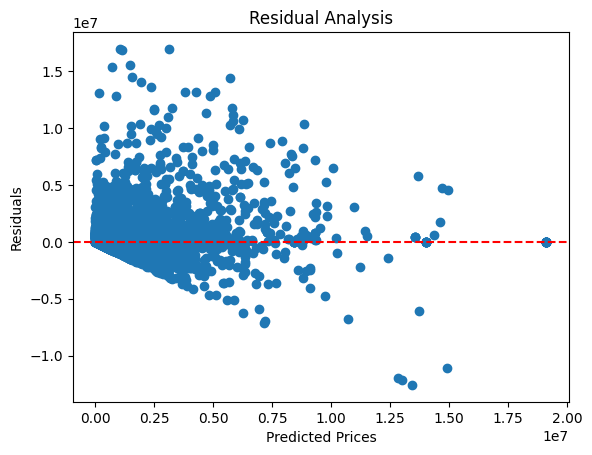

In [9]:
# residual analysis : our target - our predicted
residuals = y_test - y_pred_original
plt.scatter(y_pred_original, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()


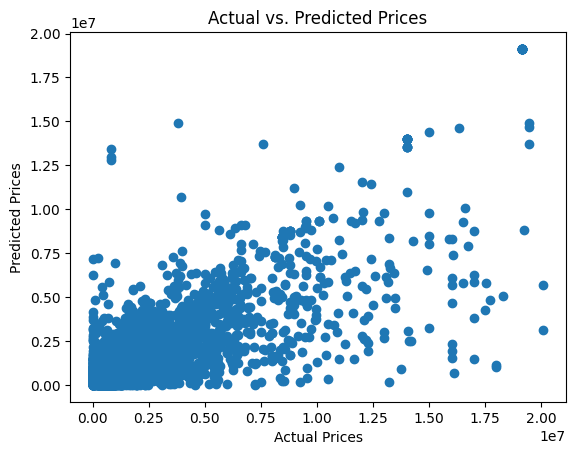

In [10]:
# use matplotlib to plot the actual and predicted prices with color
plt.scatter(y_test, y_pred_original)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

# Step 6: Feature Importance and Interpretation

* Shapley values are calculated to interpret the model.

* The bar plot shows the relative importance of each feature.



In [ ]:
# Shapley plot
X_test_preprocessed = pipeline.named_steps['preprocessor'].transform(X_test)

onehot_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(categorical_columns)

all_feature_names = list(numerical_columns) + list(onehot_feature_names)

X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=all_feature_names)

explainer = shap.Explainer(pipeline.named_steps['regressor'])
shap_values = explainer.shap_values(X_test_preprocessed)
shap.summary_plot(shap_values, X_test_preprocessed, plot_type="bar")

### Conclusion

This experiment demonstrates a complete ML pipeline for predicting apartment sales prices in NYC. The project highlights the importance of robust preprocessing, careful model evaluation, and interpretability through Shapley values. Future improvements could include hyperparameter tuning and testing alternative models.

bold text